# Getting started - Requirements
Python (🐍):  This assumes that you have a python environment installed. If you haven't, we recommend installing [Anaconda](https://docs.anaconda.com/anaconda/install/).

FPsim (♀️): This tutorial uses [FPsim v2.0](https://github.com/fpsim/fpsim/tree/rc2.0-methodtime) (still under development). 

To install, you first need to clone or download the a copy of the source code from https://github.com/starsimhub/typhoidsim
 
```
git clone -b rc2.0-methodtime --single-branch https://github.com/fpsim/fpsim.git
cd fpsim
pip install -e .
```

If it worked, you should be able to import typhoidsim with `import fpsim as fp`.

## Interventions 

At this point, you should now be able to run a single sim, using default or custom parameters and plot the results. 

In this tutorial, you will learn how to use interventions. I

### Basic simulation parameters and method choice module

In [1]:
import fpsim as fp
import sciris as sc

pars = dict(
    n_agents   = 1_000,
    location   = 'kenya',
    start_year = 2000, 
    end_year   = 2020,
    exposure_factor = 1.0  # Overall scale factor on probability of becoming pregnant
)
method_choice = fp.RandomChoice(location=pars['location'])

Starsim 0.5.2 (2024-06-04) — © 2023-2024 by IDM


### Multisim 

It is typical to want to test many interventions and compared with a baseline simulation wihtout the intervention. FPsim has the MultiSim class which handles the running of multiple simulations, }and provides mechanisms to plot the results together, to facilitate comparison. We will use this class here. But first, let's define each of our individual simulations. To distiguish each simulation in the plots, we will pass one more argument to the sim: its 'label'.  

#### 1. A simulation without intervention (baseline)

In [2]:
s1 = fp.Sim(pars=pars, contraception_module=method_choice, label="Baseline")

#### 2. A simulation with an intervention that changes the EFFICACY of a method

First let's have a look at which contraceptive methods we have available

In [5]:
for num, method in enumerate(fp.Methods()): print(f"{num+1}: {method.label}")

1: None
2: Pill
3: IUDs
4: Injectables
5: Condoms
6: BTL
7: Withdrawal
8: Implants
9: Other traditional
10: Other modern


In [4]:
change_efficacy_intervention = fp.update_methods(eff={"Injectables": 0.99}, year=2010)  # new efficacy starts in 2010

s2 = fp.Sim(pars=pars, contraception_module=method_choice, 
                 interventions=change_efficacy_intervention, 
                 label="More effective Injectables ")

#### 3. A simulation with an intervention that changes the distribution of DURATIONS on the method


Now, let's try changin a different aspect of the method: the distribution of time-on-method (duration) 

In [6]:
# The baseline duration for Injectables is a lognormal with parameter par1=2, and par2=3
change_duration_intervention = fp.update_methods(dur_use={'Injectables': dict(dist='lognormal', par1=3, par2=4)}, year=2010) 
s3 = fp.Sim(pars=pars, contraception_module=method_choice, 
                 interventions=change_duration_intervention, 
                 label="Longer time on Injectables")

#### 4. A simulation with an intervention that increases the PROBABILITY of women using contraception (default p_use=0.5)



In [7]:
change_prob_intervention = fp.update_methods(p_use=0.8, year=2010) 

s4 = fp.Sim(pars=pars, contraception_module=method_choice, 
            interventions=change_prob_intervention, 
            label="Higher probability of contraceptive use")

#### 5. A simulation with an intervention that changes the METHOD MIX (probability of using each available method)


In [9]:
# The values in method_mix should add up to 1, but if they don't, the intervention update_methods() will take care of that 
change_mix = fp.update_methods(method_mix=[0.25, 0.05, 0.05, 0.0, 0.05, 0.3, 0.1, 0.1, 0.0], year=2005.0)

s5 = fp.Sim(pars=pars, contraception_module=method_choice, 
            interventions=change_mix, 
            label='Different mix')

In [10]:
simlist = sc.autolist([s1, s2, s3, s4, s5])
msim = fp.MultiSim(sims=simlist)
msim.run(serial=True)

  Running "Baseline": 2000 of 2020 ( 0/241) (0.08 s)  ———————————————————— 0%
  Running "Baseline": 2001 of 2020 (12/241) (0.12 s)  •——————————————————— 5%
  Running "Baseline": 2002 of 2020 (24/241) (0.18 s)  ••—————————————————— 10%
  Running "Baseline": 2003 of 2020 (36/241) (0.23 s)  •••————————————————— 15%
  Running "Baseline": 2004 of 2020 (48/241) (0.27 s)  ••••———————————————— 20%
  Running "Baseline": 2005 of 2020 (60/241) (0.33 s)  •••••——————————————— 25%
  Running "Baseline": 2006 of 2020 (72/241) (0.39 s)  ••••••—————————————— 30%
  Running "Baseline": 2007 of 2020 (84/241) (0.45 s)  •••••••————————————— 35%
  Running "Baseline": 2008 of 2020 (96/241) (0.52 s)  ••••••••———————————— 40%
  Running "Baseline": 2009 of 2020 (108/241) (0.58 s)  •••••••••——————————— 45%
  Running "Baseline": 2010 of 2020 (120/241) (0.64 s)  ••••••••••—————————— 50%
  Running "Baseline": 2011 of 2020 (132/241) (0.70 s)  •••••••••••————————— 55%
  Running "Baseline": 2012 of 2020 (144/241) (0.77 

[<class 'fpsim.sim.MultiSim'>, <class 'sciris.sc_printing.prettyobj'>]
————————————————————————————————————————————————————————————————————————
Methods:
  compute_stats()         plot_age_first_birth()  split()                 
  merge()                 remerge()               to_df()                 
  plot()                  run()                   
————————————————————————————————————————————————————————————————————————
already_run: True
   base_sim: Sim("Baseline"; n=1000; 2000-2020; results: b=576 ☠=170
             pop=1377)
    created: datetime.datetime(2024, 9, 26, 16, 20, 42, 150534)
   git_info: {'branch': 'rc2.0-tuts-community-day', 'hash': '84ede14',
             'date': '20 [...]
      label: 'Baseline'
    results: #0. 't':
             array([2000.        , 2000.08333333, 2000.16666667,
             2000.25  [...]
   run_args: {}
       sims: [Sim("Baseline"; n=1000; 2000-2020; results: b=576 ☠=170
             pop=1377), S [...]
    version: '2.0.0-dev'
      which: No

AttributeError: 'numpy.ndarray' object has no attribute 'high'

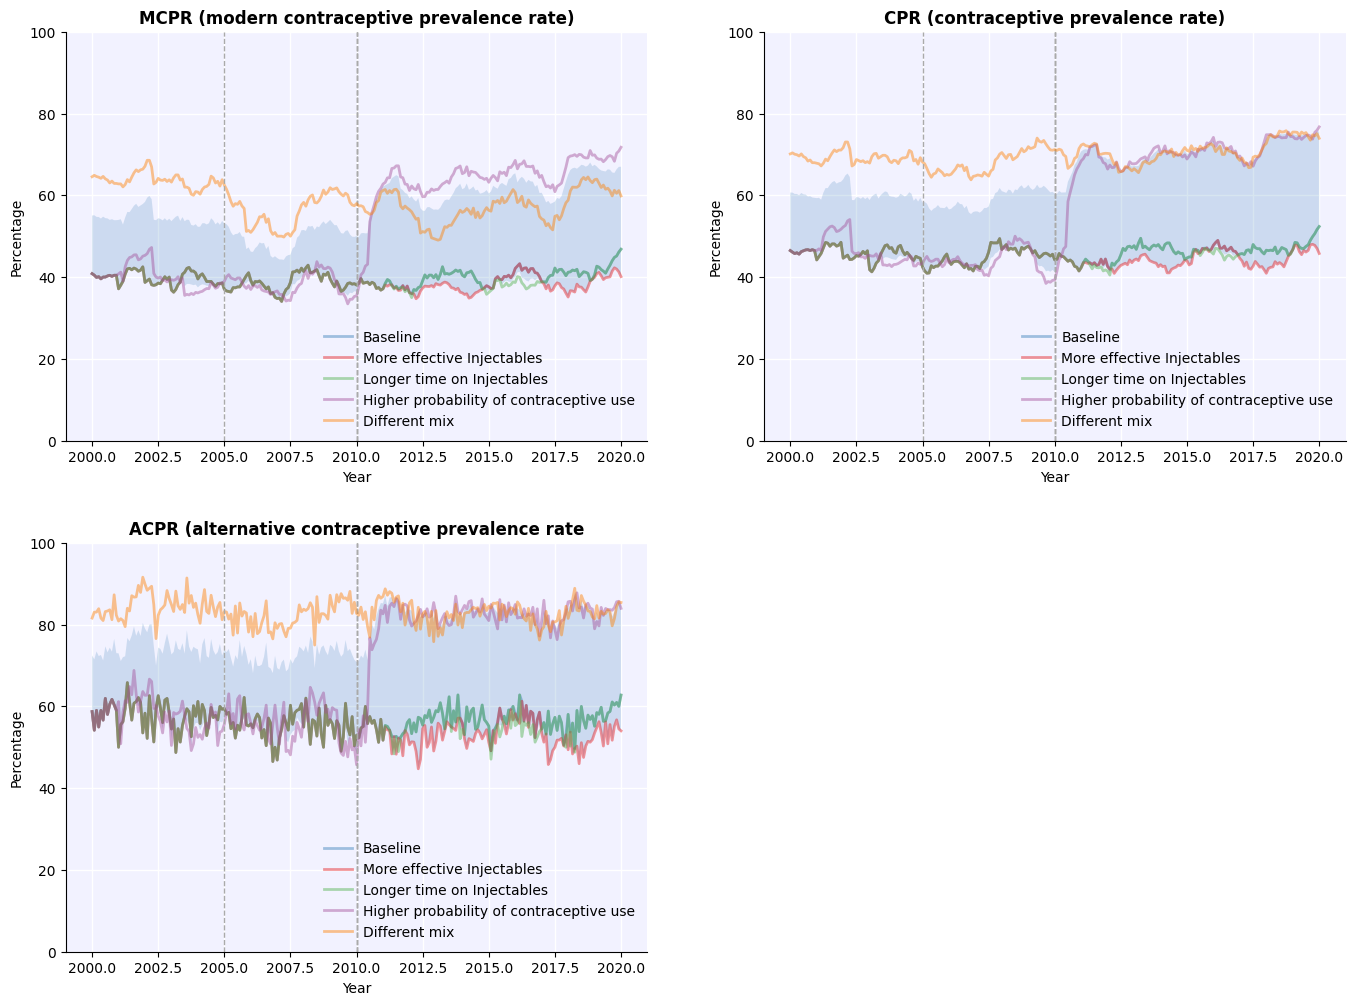

In [12]:
msim.plot(to_plot='cpr');